## Dataset 1 - Representations from Vision Transformer

In [7]:
from KNNClassifier import KNNClassifier
from MLPClassifier import MLPClassifier
from GradKNNClassifier import GradKNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

import sklearn.neural_network
import sklearn.svm

In [8]:
study_name = "dataset1"
device = DatasetRun.get_device()

Device used: cuda


## Sample run

Using KNNClassifier:

In [9]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=0.5, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the KNN Classifier
kmeans = KMeans(n_clusters=20, metric=metric_kmeans)
clf = KNNClassifier(n_neighbors=5, 
                    metric=metric, 
                    is_normalization=False, 
                    tukey_lambda=1, 
                    kmeans=kmeans, 
                    device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=True)

|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 100%        | 100%     |        1 | 100.00%            |
task 0: (time: 1.6875s)
FeCAM accuracy: 97.9000; My accuracy: 98.1000
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 97%         | 98%      |     0.97 | 50.25%             |
|      1 | 97%         | 97%      |     0.97 | 49.75%             |
task 1: (time: 1.6301s)
FeCAM accuracy: 94.8500; My accuracy: 95.1000
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 95%         | 94%      |     0.95 | 32.93%             |
|      1 | 94%         | 95%      |     0.95 | 33.63%             |
|      2 | 94%         | 94%      |     0.94 | 33.43%             |
task 2: (time: 2.0346s)
FeCAM accuracy: 92.3

Using MLPClassifier:

In [10]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=0.5, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Define the model to use in MLPClassifier
model = sklearn.neural_network.MLPClassifier(solver='adam',
                                             hidden_layer_sizes=(100,),
                                             learning_rate_init=0.01,
                                             max_iter=1000)

# Initialize KMeans and the MLPClassifier
kmeans = KMeans(n_clusters=20, metric=metric_kmeans)
clf = MLPClassifier(model=model,
                    n_store=50, 
                    selection_method='random', 
                    metric=metric, 
                    is_normalization=False,
                    tukey_lambda=1, 
                    kmeans=kmeans, 
                    device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=True)

|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 100%        | 100%     |        1 | 100.00%            |
task 0: (time: 1.4700s)
FeCAM accuracy: 97.9000; My accuracy: 98.2000
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 97%         | 91%      |     0.94 | 46.90%             |
|      1 | 92%         | 98%      |     0.95 | 53.10%             |
task 1: (time: 3.0050s)
FeCAM accuracy: 94.8500; My accuracy: 91.9500
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 95%         | 92%      |     0.93 | 32.30%             |
|      1 | 93%         | 94%      |     0.93 | 33.63%             |
|      2 | 92%         | 94%      |     0.93 | 34.07%             |
task 2: (time: 4.1986s)
FeCAM accuracy: 92.3

Using GradKNNClassifier:

In [11]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=1, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()


# Initialize KMeans and the MLPClassifier
kmeans = KMeans(n_clusters=75, metric=metric_kmeans)
clf = GradKNNClassifier(metric=metric,
                        kmeans=kmeans,
                        is_normalization=False,
                        device=device,
                        batch_size=64,
                        n_points=20,
                        mode=1,
                        num_epochs=100,
                        lr=0.003,
                        early_stop_patience=10,
                        train_previous=True,
                        reg_type=2,
                        reg_lambda=0.01,
                        use_tanh=True,
                        tanh_x=1,
                        use_standardization=False,
                        add_centroids=True,
                        only_prev_centroids=True,
                        new_old_ratio=0.2,
                        dataloader_batch_size=64,
                        verbose=True)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=True)

Dataloader created
Validation Accuracy after Epoch [1/100]: 52.20%, Loss = 3.0095,
Validation Accuracy after Epoch [21/100]: 99.80%, Loss = 0.1201,
Validation Accuracy after Epoch [41/100]: 100.00%, Loss = 0.0028,
Validation Accuracy after Epoch [61/100]: 100.00%, Loss = 0.0014,
Validation Accuracy after Epoch [81/100]: 100.00%, Loss = 0.0008,
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---------|---------:|:-------------------|
|      0 | 100%        | 100%     |        1 | 100.00%            |
task 0: (time: 49.4149s)
FeCAM accuracy: 97.9000; My accuracy: 96.8000
Dataloader created
Validation Accuracy after Epoch [1/100]: 89.91%, Loss = 0.3665,
Validation Accuracy after Epoch [21/100]: 100.00%, Loss = 0.0020,
Validation Accuracy after Epoch [41/100]: 99.83%, Loss = 0.0022,
Early Stopping at Epoch [48/100]: Accuracy = 100.00%, Loss = 0.0020,
|   Task | Precision   | Recall   |   FScore | % of all Answers   |
|-------:|:------------|:---

GradKNN Parameters:

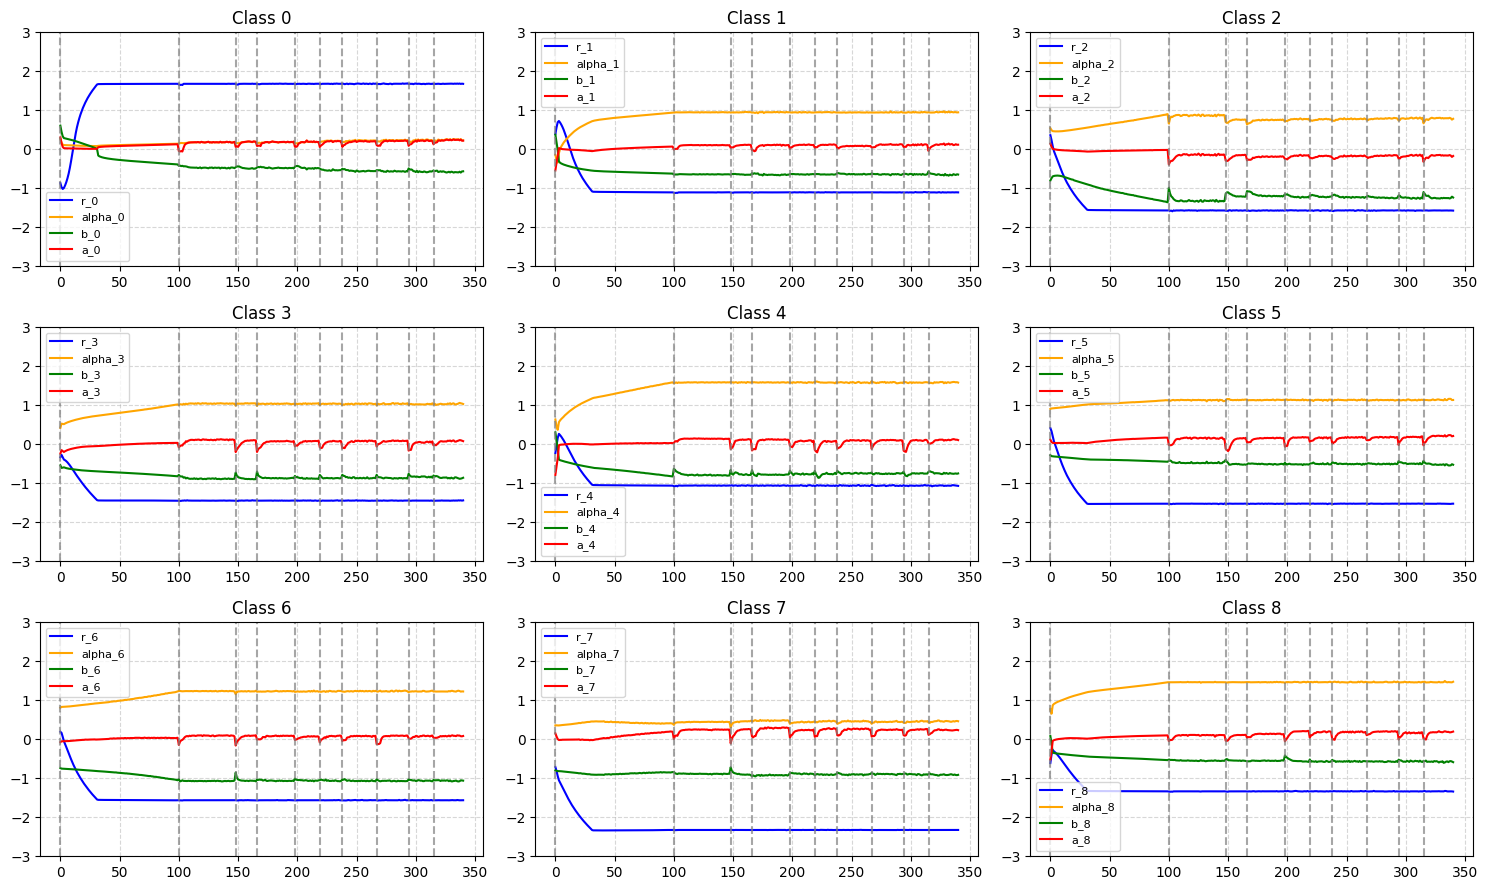

In [12]:
classes_to_plot = list(range(0, 9, 1))  # A few classes, just to show how it works
DatasetRun.plot_gradknn_parameters(classes_to_plot, n_cols=3)

## Grid search results

plot accuracy over trials (to check how well did the grid search work) - KNNClassifier

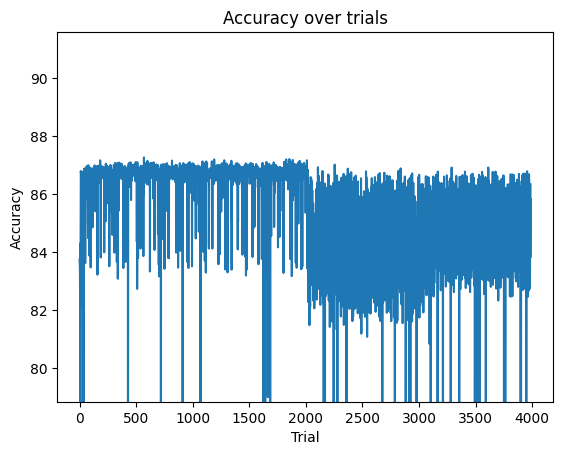

In [13]:
DatasetRun.plot_accuracy_trials(study_name=study_name, path='../results/', ylim=True)

plot accuracies against hyperparameters' values 

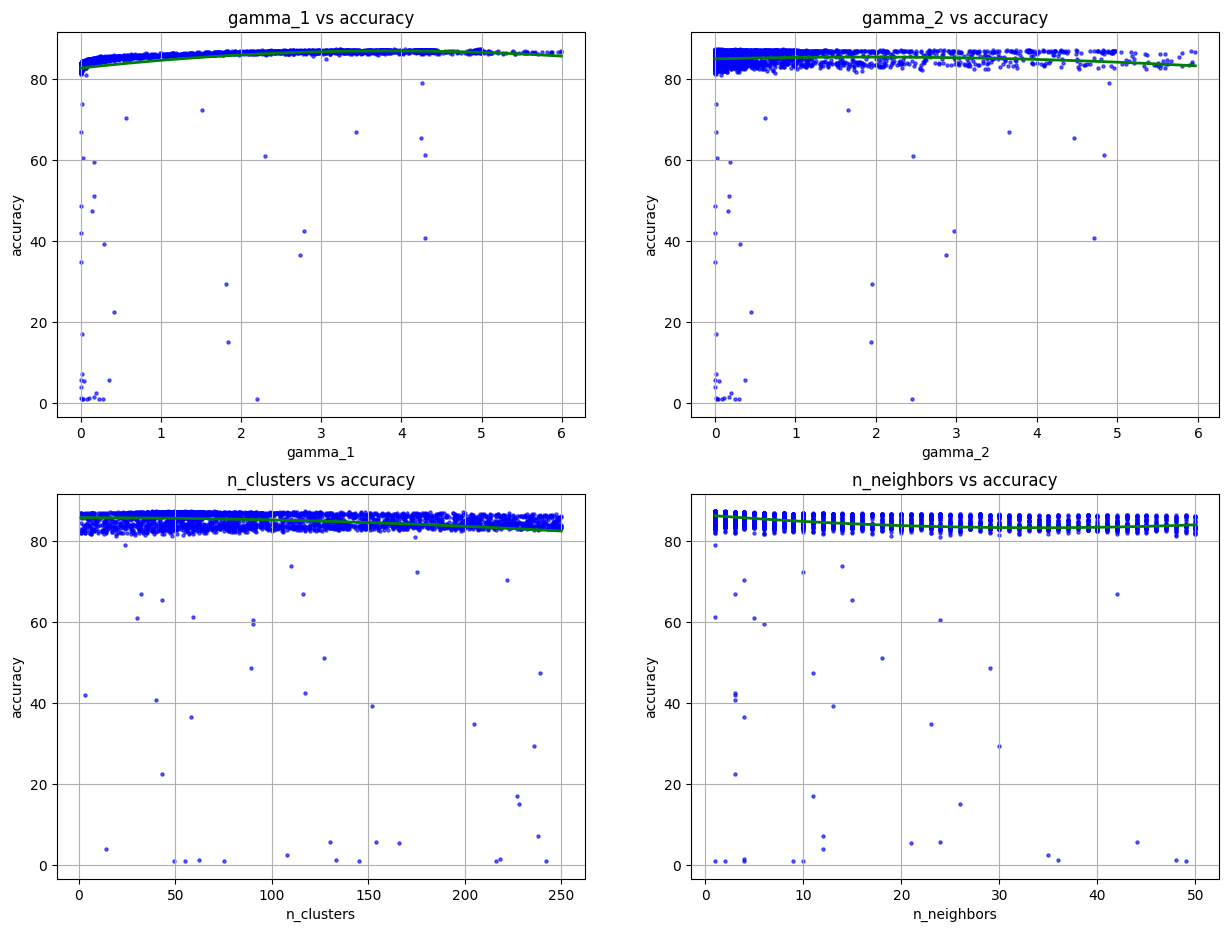

In [14]:
DatasetRun.plot_hyperparameters(study_name, path='../results/', columns=2, deg=2, ylim=False)

display the top hyperparameters

In [15]:
display(DatasetRun.print_results(study_name, path='../results/', only_important=True))

,value,gamma_1,gamma_2,n_clusters,n_neighbors
569,87.26,3.229014,0.310787,58,1
1855,87.20,4.952593,0.087917,38,1
1190,87.19,3.905827,0.005105,46,1
1827,87.19,4.994804,0.024191,49,2
1885,87.17,4.977360,0.057101,117,1
...,...,...,...,...,...
911,1.02,0.273035,0.295938,55,1
1641,1.01,2.192861,2.441110,75,2
2360,1.01,0.070467,0.081732,216,49
3104,1.00,0.017517,0.019225,145,9
